In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib as mpl

mpl.rc('font', family = 'NanumGothic')
mpl.rc('axes', unicode_minus = False)

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [4]:
train.shape, test.shape, sample_submission.shape 

((1095, 13), (365, 12), (365, 2))

In [5]:
train.head()

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
0,2018-01-01,NaN,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950
1,2018-01-02,NaN,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136
2,2018-01-03,NaN,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156
3,2018-01-04,NaN,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102
4,2018-01-05,NaN,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1095 non-null   object 
 1   precipitation  417 non-null    float64
 2   temp_mean      1095 non-null   float64
 3   temp_highest   1095 non-null   float64
 4   temp_lowest    1095 non-null   float64
 5   PM10           1028 non-null   float64
 6   PM2.5          1027 non-null   float64
 7   humidity       1095 non-null   float64
 8   sunshine_sum   1090 non-null   float64
 9   sunshine_rate  1095 non-null   float64
 10  wind_mean      1095 non-null   float64
 11  wind_max       1095 non-null   float64
 12  rental         1095 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 111.3+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           365 non-null    object 
 1   precipitation  160 non-null    float64
 2   temp_mean      365 non-null    float64
 3   temp_highest   365 non-null    float64
 4   temp_lowest    365 non-null    float64
 5   PM10           365 non-null    float64
 6   PM2.5          365 non-null    float64
 7   humidity       365 non-null    float64
 8   sunshine_sum   364 non-null    float64
 9   sunshine_rate  365 non-null    float64
 10  wind_mean      365 non-null    float64
 11  wind_max       365 non-null    float64
dtypes: float64(11), object(1)
memory usage: 34.3+ KB


In [7]:
# 문자열을 datetime 타입으로 변경
import datetime as dt

train['date'] = pd.to_datetime(train['date']) # astype('object')로 변경해 버리면 year, month, ... 못나눔
# train['date'] = train.datetime.apply(pd.to_datetime)

train['year'] = train['date'].dt.strftime("%Y").astype('object')
# train['year'] = train.datetime.apply(lambda x : x.year)
train['month'] = train['date'].dt.strftime("%m").astype('object')
train['day'] = train['date'].dt.strftime('%d').astype('object')

In [8]:
test['date'] = pd.to_datetime(test['date'])

test['year'] = test['date'].dt.strftime("%Y").astype('object')
test['month'] = test['date'].dt.strftime("%m").astype('object')
test['day'] = test['date'].dt.strftime('%d').astype('object')

In [9]:
train.drop(['date'], axis = 1, inplace = True)
test.drop(['date'], axis = 1, inplace = True)

In [10]:
# 결측치 제거
train.isnull().sum()

precipitation    678
temp_mean          0
temp_highest       0
temp_lowest        0
PM10              67
PM2.5             68
humidity           0
sunshine_sum       5
sunshine_rate      0
wind_mean          0
wind_max           0
rental             0
year               0
month              0
day                0
dtype: int64

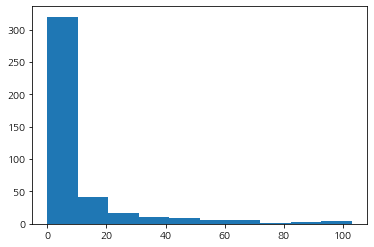

In [11]:
# 강수량의 결측치 데이터가 678개로 절반 이상이 없으므로 열을 제거한다.
# 제거하기엔 강수량 데이터는 중요함
# 그래서 강수량 데이터의 nan을 0으로 대체하겠다.
# 기상청 포털, 서울 데이터 광장을 통해 nan 데이터를 불러올 수 있을 듯
plt.hist(train['precipitation'])
plt.show()

In [12]:
train['precipitation'] = train['precipitation'].replace(np.nan, 0)
test['precipitation'] = test['precipitation'].replace(np.nan, 0)

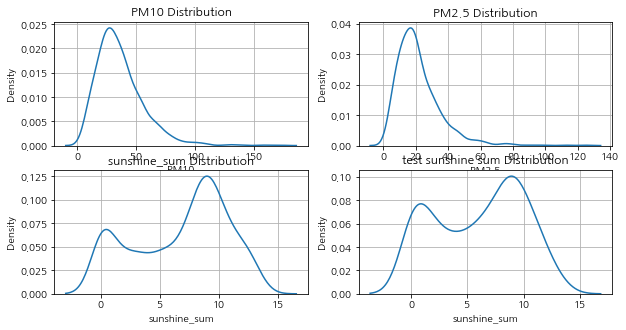

In [13]:
plt.figure(figsize = (10, 5))
plt.subplot(221)
sns.kdeplot(train.PM10)
plt.title('PM10 Distribution')
plt.grid(True)

plt.subplot(222)
sns.kdeplot(train["PM2.5"])
plt.title('PM2.5 Distribution')
plt.grid(True)

plt.subplot(223)
sns.kdeplot(train["sunshine_sum"])
plt.title('sunshine_sum Distribution')
plt.grid(True)

plt.subplot(224)
sns.kdeplot(test["sunshine_sum"])
plt.title('test sunshine sum Distribution')
plt.grid(True)

plt.show()

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

train['PM10'] = imputer.fit_transform(train[['PM10']])
train['PM2.5'] = imputer.fit_transform(train[['PM2.5']])
train['sunshine_sum'] = imputer.fit_transform(train[['sunshine_sum']])
test['sunshine_sum'] = imputer.fit_transform(test[['sunshine_sum']])
# train.fillna(train.mean(), inplace = True)

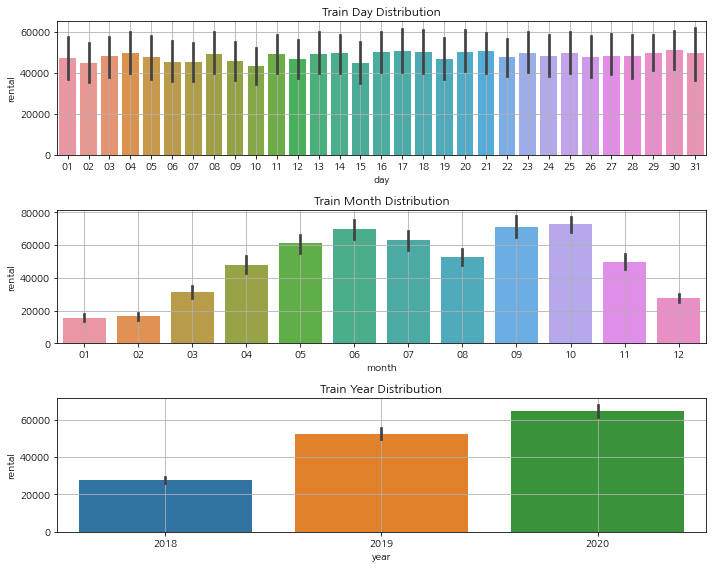

In [15]:
plt.figure(figsize = (10, 8))
plt.subplot(311)
sns.barplot(x = 'day', y = 'rental', data = train)
plt.title('Train Day Distribution')
plt.grid(True)

plt.subplot(312)
sns.barplot(x = 'month', y = 'rental', data = train)
plt.title('Train Month Distribution')
plt.grid(True)

plt.subplot(313)
sns.barplot(x = 'year', y = 'rental', data = train)
plt.title('Train Year Distribution')
plt.grid(True)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='rental', ylabel='Density'>

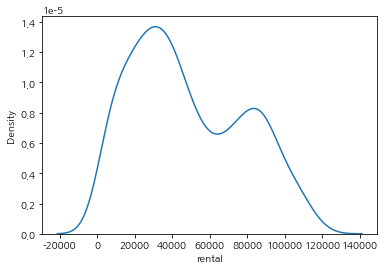

In [16]:
sns.kdeplot('rental', data = train) 
# 비대칭이지만 완전히 치우친 비대칭은 아님
# np.log1p를 못쓴다.

In [17]:
num_cols = train.select_dtypes(include = "float64").columns
num_cols

Index(['precipitation', 'temp_mean', 'temp_highest', 'temp_lowest', 'PM10',
       'PM2.5', 'humidity', 'sunshine_sum', 'sunshine_rate', 'wind_mean',
       'wind_max'],
      dtype='object')

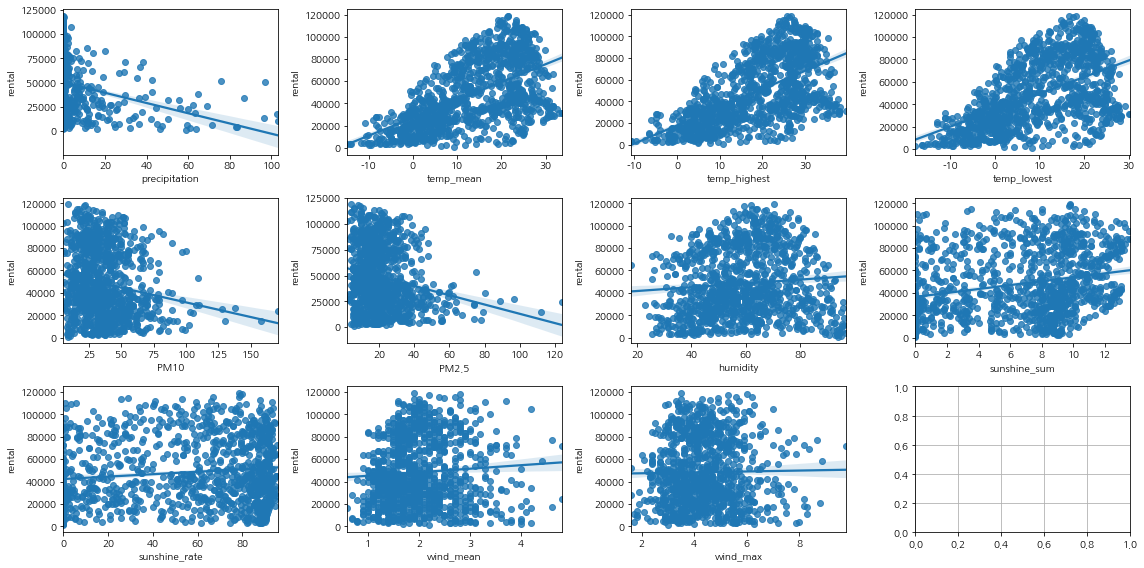

In [18]:
fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 3)

for i, col in enumerate(num_cols):
    rows = int(i/4)
    cols = i % 4
    plt.grid(True)
    plt.tight_layout()
    sns.regplot(x = col, y = 'rental', data = train, ax = axs[rows][cols])

In [19]:
train

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,year,month,day
0,0.0,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950,2018,01,01
1,0.0,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136,2018,01,02
2,0.0,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156,2018,01,03
3,0.0,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102,2018,01,04
4,0.0,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705,2018,01,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103,2020,12,27
1091,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912,2020,12,28
1092,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747,2020,12,29
1093,0.0,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488,2020,12,30


In [20]:
test

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,year,month,day
0,0.0,-4.2,1.6,-9.8,30.0,17.0,64.0,6.5,67.7,2.0,4.1,2021,01,01
1,0.0,-5.0,-1.4,-8.4,34.0,12.0,38.5,9.0,93.8,2.6,5.4,2021,01,02
2,0.0,-5.6,-2.0,-9.1,39.0,14.0,45.0,5.5,56.7,2.0,4.5,2021,01,03
3,0.0,-3.5,0.3,-8.4,40.0,23.0,51.4,4.6,47.4,1.7,3.2,2021,01,04
4,0.0,-5.5,-2.1,-9.9,30.0,17.0,52.8,8.6,88.7,2.9,5.7,2021,01,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.0,-7.6,-3.9,-12.9,33.0,20.0,60.9,3.8,39.6,1.7,3.1,2021,12,27
361,0.0,-4.1,-0.9,-8.5,51.0,38.0,73.8,1.7,17.7,2.2,3.1,2021,12,28
362,0.2,0.4,5.9,-3.8,66.0,49.0,72.9,1.8,18.8,2.6,5.9,2021,12,29
363,0.0,-3.9,0.2,-6.8,30.0,17.0,48.5,7.3,76.0,3.3,6.6,2021,12,30


In [21]:
X = train.drop(['rental', 'year', 'day'], axis = 1)
y = train['rental']

test_x = test.drop(['year', 'day'], axis = 1)

In [23]:
X.shape, test_x.shape

((1095, 12), (365, 12))

In [24]:
X[X.duplicated()] # 중복값 없다.

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,month


In [25]:
num_cols2 = X.select_dtypes(include = 'float64').columns

In [26]:
def OutlierDetect(df):
    for col in num_cols2:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        
        outliers = (df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)
        print(col, '의 이상치의 비율: ', len(df[outliers]) / len(df))

In [27]:
OutlierDetect(X)

precipitation 의 이상치의 비율:  0.2136986301369863
temp_mean 의 이상치의 비율:  0.0
temp_highest 의 이상치의 비율:  0.0
temp_lowest 의 이상치의 비율:  0.0
PM10 의 이상치의 비율:  0.039269406392694065
PM2.5 의 이상치의 비율:  0.0502283105022831
humidity 의 이상치의 비율:  0.0
sunshine_sum 의 이상치의 비율:  0.0
sunshine_rate 의 이상치의 비율:  0.0
wind_mean 의 이상치의 비율:  0.0319634703196347
wind_max 의 이상치의 비율:  0.0228310502283105


In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1095 non-null   float64
 1   temp_mean      1095 non-null   float64
 2   temp_highest   1095 non-null   float64
 3   temp_lowest    1095 non-null   float64
 4   PM10           1095 non-null   float64
 5   PM2.5          1095 non-null   float64
 6   humidity       1095 non-null   float64
 7   sunshine_sum   1095 non-null   float64
 8   sunshine_rate  1095 non-null   float64
 9   wind_mean      1095 non-null   float64
 10  wind_max       1095 non-null   float64
 11  month          1095 non-null   object 
dtypes: float64(11), object(1)
memory usage: 102.8+ KB


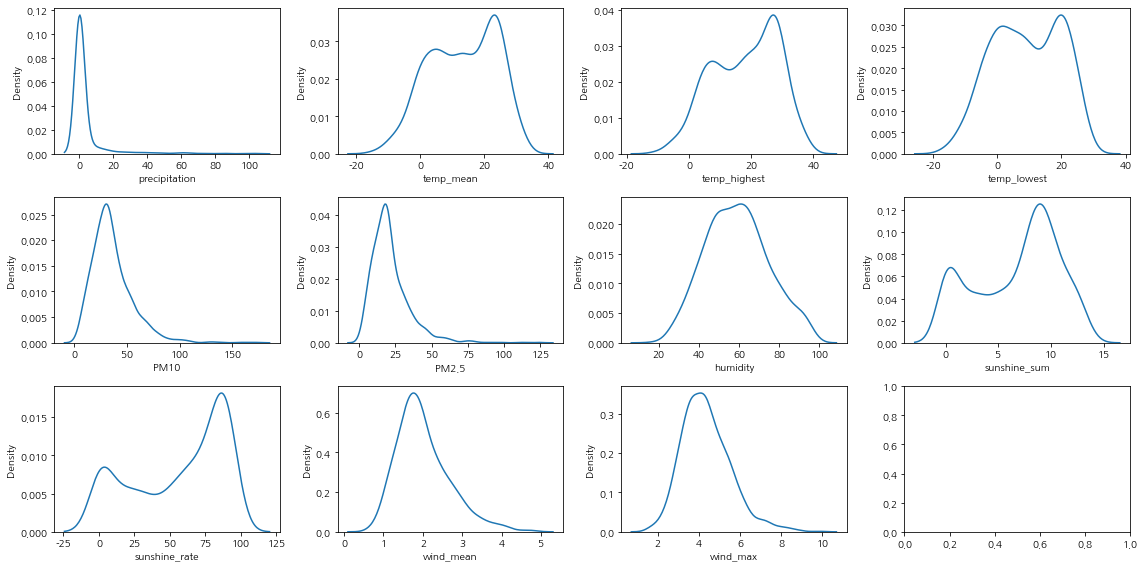

In [33]:
fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 3)

for i, col in enumerate(num_cols2):
    rows = int(i/4)
    cols = i % 4
    sns.kdeplot(X.iloc[:, i], ax = axs[rows][cols])
    plt.tight_layout()
    
plt.show()

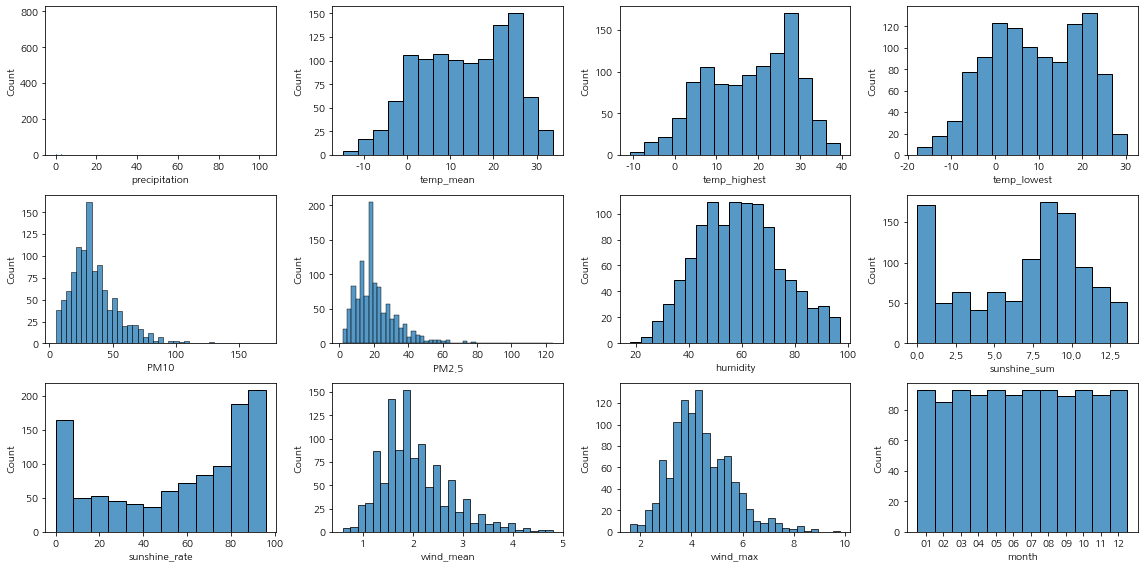

In [30]:
fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 3)

for i, col in enumerate(X.columns):
    rows = int(i/4)
    cols = i % 4
    sns.histplot(X.iloc[:, i], ax = axs[rows][cols])
    plt.tight_layout()
    
plt.show()

In [34]:
# 수치형 데이터 표준화
from sklearn.preprocessing import MinMaxScaler

num_cols2 = X.select_dtypes(exclude = "object").columns
for col in num_cols2:
    scaler = MinMaxScaler()
    X[col] = scaler.fit_transform(X[[col]])
    test[col] = scaler.transform(test[[col]])

In [36]:
cat_features = X.select_dtypes(include = "object").columns
cat_features

Index(['month'], dtype='object')

In [38]:
X2 = pd.get_dummies(X, columns = cat_features)
test_x2 = pd.get_dummies(test_x, columns = cat_features)

In [39]:
y

0        4950
1        7136
2        7156
3        7102
4        7705
        ...  
1090    37103
1091    46912
1092    35747
1093    22488
1094    24535
Name: rental, Length: 1095, dtype: int64

In [40]:
# y 스케일??

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((766, 23), (329, 23), (766,), (329,))

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [44]:
def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n = None, verbose = True, return_coeff = True):
    coeff_df = pd.DataFrame()
    if verbose: print('######', model_name, '######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha = param)
        elif model_name == 'Lasso': model = Lasso(alpha = param)
        elif model_name == "ElasticNet": model = ElasticNet(alpha = param, l1_ratio = 0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring = "neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
        
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coeff = pd.Series(data = model.coef_, index = X_data_n.columns)
            colname = "alpha: " + str(param)
            coeff_df[colname] = coeff
            
    return coeff_df

In [45]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n = X_train, y_target_n = y_train, verbose = False, return_coeff = False)

alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 19037.529
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 19037.395
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 19035.846
alpha 1일 때 5 폴드 세트의 평균 RMSE: 19033.862
alpha 3일 때 5 폴드 세트의 평균 RMSE: 19028.431


In [46]:
ridge_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_ridge_df = get_linear_reg_eval('Ridge', params = lasso_alphas, X_data_n = X_train, y_target_n = y_train, verbose = False, return_coeff = False)

alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 19018.434
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 19016.914
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 19053.758
alpha 1일 때 5 폴드 세트의 평균 RMSE: 19112.125
alpha 3일 때 5 폴드 세트의 평균 RMSE: 19332.680


In [47]:
ridge_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_ridge_df = get_linear_reg_eval('ElasticNet', params = lasso_alphas, X_data_n = X_train, y_target_n = y_train, verbose = False, return_coeff = False)


alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 20209.364
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 20576.082
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 23439.528
alpha 1일 때 5 폴드 세트의 평균 RMSE: 25232.189
alpha 3일 때 5 폴드 세트의 평균 RMSE: 27711.314


In [48]:
rf_params = {'n_estimators': [500, 700],
            'max_depth': np.arange(6, 12, 2),
            'min_samples_leaf': np.arange(1, 3, 1),
            'min_samples_split': np.arange(1, 6, 1)}

rf_reg = RandomForestRegressor(random_state = 42, n_jobs = -1)
grid_rf_cv = GridSearchCV(rf_reg, param_grid = rf_params, cv = 5, n_jobs = -1)
grid_rf_cv.fit(X_train, y_train)

print('RandomForest 최적 하이퍼퍼라미터: \n', grid_rf_cv.best_params_)

RandomForest 최적 하이퍼퍼라미터: 
 {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 700}


In [49]:
best_rf_reg = grid_rf_cv.best_estimator_

In [50]:
dt_params = {'max_depth': list(range(6, 12, 2)),
            'min_samples_leaf': list(range(1, 3, 1)),
            'min_samples_split': list(range(1, 6, 1)),
            'max_features': list(range(6, 12, 2)),
            }

dt_reg = DecisionTreeRegressor(random_state = 42)
grid_dt_cv = GridSearchCV(dt_reg, param_grid = dt_params, cv = 5, n_jobs = -1)
grid_dt_cv.fit(X_train, y_train)

print("DecisionTree 최적 하이퍼파라미터: \n", grid_dt_cv.best_params_)

DecisionTree 최적 하이퍼파라미터: 
 {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [51]:
best_dt_reg = grid_dt_cv.best_estimator_

In [52]:
gradient_params = {'learning_rate': [0.0001, 0.001, 0.01, 0.1],
                  'n_estimators': [300, 500],
                   'max_depth': list(range(2, 4, 1)),
                   "subsample": [0.3, 0.5, 0.7],
                  }

gradient_reg = GradientBoostingRegressor(random_state = 42)
grid_gradient_cv =  GridSearchCV(gradient_reg, param_grid = gradient_params, cv = 5, n_jobs = -1)
grid_gradient_cv.fit(X_train, y_train)

print("GradientBoost 최적 하이퍼파라미터 \n", grid_gradient_cv.best_params_)

GradientBoost 최적 하이퍼파라미터 
 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300, 'subsample': 0.5}


In [53]:
best_gradient_reg = grid_gradient_cv.best_estimator_

In [54]:
ada_params = {'n_estimators' : [300, 500],
             'learning_rate': [0.0001, 0.001, 0.01, 0.1]}

ada_reg = AdaBoostRegressor(random_state = 42)
grid_ada_cv =  GridSearchCV(ada_reg, param_grid = ada_params, cv = 5, n_jobs = -1)
grid_ada_cv.fit(X_train, y_train)

print("GradientBoost 최적 하이퍼파라미터 \n", grid_ada_cv.best_params_)

GradientBoost 최적 하이퍼파라미터 
 {'learning_rate': 0.1, 'n_estimators': 300}


In [55]:
best_ada_reg = grid_ada_cv.best_estimator_

In [56]:
xgb_params = {'learning_rate': [0.0001, 0.001, 0.01, 0.1],
             'min_child_weight': [1, 3, 5],
             'gamma': [0, 1, 2, 3],
             'max_depth': list(range(2, 4, 1)),
             'subsample': [0.3, 0.5, 0.7],
             'colsample_bytree': [0.5, 0.8]
            }

xgb_reg = XGBRegressor(random_state = 42)
grid_xgb_cv = GridSearchCV(xgb_reg, param_grid = xgb_params, cv = 5, n_jobs = -1)
grid_xgb_cv.fit(X_train, y_train)

print("XGBoost 최적 하이퍼파라미터 \n", grid_xgb_cv.best_params_)

XGBoost 최적 하이퍼파라미터 
 {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.7}


In [57]:
best_xgb_reg = grid_xgb_cv.best_estimator_

In [58]:
lgbm_params = {'num_iterations': [300, 500],
              'learning_rate': [0.0001, 0.001, 0.01, 0.1],
              'max_depth': list(range(2, 4, 1)),
              'min_child_samples': list(range(1, 3, 1)),
              'num_leaves': list(range(1, 3, 1)),
              'bagging_function': [0.3, 0.5, 0.7]}

lgbm_reg = LGBMRegressor(random_state = 42)
grid_lgbm_cv = GridSearchCV(lgbm_reg, param_grid = lgbm_params, cv = 5, n_jobs = -1)
grid_lgbm_cv.fit(X_train, y_train)

print("LGBM 최적 하이퍼파라미터 \n", grid_lgbm_cv.best_params_)

[LightGBM] [Warning] Unknown parameter: bagging_function
LGBM 최적 하이퍼파라미터 
 {'bagging_function': 0.3, 'learning_rate': 0.1, 'max_depth': 2, 'min_child_samples': 1, 'num_iterations': 500, 'num_leaves': 2}


In [59]:
best_lgbm_reg = grid_lgbm_cv.best_estimator_

In [60]:
svr_params = {'C': [0.5, 0.7, 0.9, 1],
                 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

svr_reg = SVR()
grid_svr_cv = GridSearchCV(svr_reg, param_grid = svr_params, cv = 5, n_jobs = -1)
grid_svr_cv.fit(X_train, y_train)

print("SVR 최적 하이퍼파라미터 \n", grid_svr_cv.best_params_)

SVR 최적 하이퍼파라미터 
 {'C': 1, 'kernel': 'poly'}


In [61]:
best_svr_reg = grid_svr_cv.best_estimator_

In [62]:
best_rf_reg.fit(X_train, y_train)
best_pred_rf = best_rf_reg.predict(X_test)

In [63]:
rf_neg_mse_scores = cross_val_score(best_rf_reg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 5)
rf_rmse_scores = np.sqrt(-1 * rf_neg_mse_scores)
rf_avg_rmse = np.mean(rf_rmse_scores)

In [71]:
from sklearn.metrics import r2_score

print('RandomForestRegressor rmse 평균: ', rf_avg_rmse)
print('RandomFoestRegressor r2_score: ', r2_score(y_test, best_pred_rf))

RandomForestRegressor rmse 평균:  16039.062771751884
RandomFoestRegressor r2_score:  0.6983765743682397


In [65]:
best_dt_reg.fit(X_train, y_train)
best_reg_dt = best_dt_reg.predict(X_test)

dt_neg_mse_scores = cross_val_score(best_dt_reg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 5)
dt_rmse_scores = np.sqrt(-1 * dt_neg_mse_scores)
dt_avg_rmse = np.mean(dt_rmse_scores)

In [72]:
print('DecisionTreeRegressor rmse 평균: ', dt_avg_rmse)
print('DecisionTreeRegressor r2_score: ', r2_score(y_test, best_reg_dt))

DecisionTreeRegressor rmse 평균:  19606.103112391065
DecisionTreeRegressor r2_score:  0.5660642203680066


In [69]:
best_gradient_reg.fit(X_train, y_train)
best_reg_gradient = best_gradient_reg.predict(X_test)

gradient_neg_mse_scores = cross_val_score(best_gradient_reg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 5)
gradient_rmse_scores = np.sqrt(-1 * gradient_neg_mse_scores)
gradient_avg_rmse = np.mean(gradient_rmse_scores)

In [73]:
print('Gradient rmse 평균: ', gradient_avg_rmse)
print('Gradient r2_score: ', r2_score(y_test, best_reg_gradient))

Gradient rmse 평균:  15269.348377860175
Gradient r2_score:  0.7109468097083221


In [74]:
best_ada_reg.fit(X_train, y_train)
best_reg_ada = best_ada_reg.predict(X_test)

ada_neg_mse_scores = cross_val_score(best_ada_reg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 5)
ada_rmse_scores = np.sqrt(-1 * ada_neg_mse_scores)
ada_avg_rmse = np.mean(ada_rmse_scores)

In [75]:
print('AdaBoost rmse 평균: ', ada_avg_rmse)
print('AdaBoost r2_score: ', r2_score(y_test, best_reg_ada))

AdaBoost rmse 평균:  18348.923485138854
AdaBoost r2_score:  0.6311866732743039


In [76]:
best_xgb_reg.fit(X_train, y_train)
best_reg_xgb = best_xgb_reg.predict(X_test)

xgb_neg_mse_scores = cross_val_score(best_xgb_reg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 5)
xgb_rmse_scores = np.sqrt(-1 * xgb_neg_mse_scores)
xgb_avg_rmse = np.mean(xgb_rmse_scores)

In [79]:
print('XGBoost rmse 평균: ', xgb_avg_rmse)
print('XGBoost r2_score: ', r2_score(y_test, best_reg_xgb))

XGBoost rmse 평균:  15290.80494338935
XGBoost r2_score:  0.7176756754293636


In [78]:
best_lgbm_reg.fit(X_train, y_train)
best_reg_lgbm = best_lgbm_reg.predict(X_test)

lgbm_neg_mse_scores = cross_val_score(best_lgbm_reg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 5)
lgbm_rmse_scores = np.sqrt(-1 * lgbm_neg_mse_scores)
lgbm_avg_rmse = np.mean(lgbm_rmse_scores)

[LightGBM] [Warning] Unknown parameter: bagging_function
[LightGBM] [Warning] Unknown parameter: bagging_function
[LightGBM] [Warning] Unknown parameter: bagging_function
[LightGBM] [Warning] Unknown parameter: bagging_function
[LightGBM] [Warning] Unknown parameter: bagging_function


In [80]:
print('LGBM rmse 평균: ', lgbm_avg_rmse)
print('LGBM r2_score: ', r2_score(y_test, best_reg_lgbm))

LGBM rmse 평균:  16202.694546592433
LGBM r2_score:  0.6899023610191288


In [81]:
best_svr_reg.fit(X_train, y_train)
best_reg_svr = best_svr_reg.predict(X_test)

svr_neg_mse_scores = cross_val_score(best_svr_reg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 5)
svr_rmse_scores = np.sqrt(-1 * svr_neg_mse_scores)
svr_avg_rmse = np.mean(svr_rmse_scores)

In [82]:
print('SVR rmse 평균: ', lgbm_avg_rmse)
print('SVR r2_score: ', r2_score(y_test, best_reg_svr)) # ????

SVR rmse 평균:  16202.694546592433
SVR r2_score:  -0.03314194912921775


In [85]:
print('RandomForestRegressor rmse 평균: ', rf_avg_rmse)
print('DecisionTreeRegressor rmse 평균: ', dt_avg_rmse)
print('Gradient rmse 평균: ', gradient_avg_rmse)
print('AdaBoost rmse 평균: ', ada_avg_rmse)
print('XGBBoost rmse 평균: ', xgb_avg_rmse)
print('LGBM rmse 평균: ', lgbm_avg_rmse)
print('SVR rmse 평균: ', lgbm_avg_rmse)

RandomForestRegressor rmse 평균:  16039.062771751884
DecisionTreeRegressor rmse 평균:  19606.103112391065
Gradient rmse 평균:  15269.348377860175
AdaBoost rmse 평균:  18348.923485138854
XGBBoost rmse 평균:  15290.80494338935
LGBM rmse 평균:  16202.694546592433
SVR rmse 평균:  16202.694546592433


In [84]:
print('RandomFoestRegressor r2_score: ', r2_score(y_test, best_pred_rf))
print('DecisionTreeRegressor r2_score: ', r2_score(y_test, best_reg_dt))
print('Gradient r2_score: ', r2_score(y_test, best_reg_gradient))
print('AdaBoost r2_score: ', r2_score(y_test, best_reg_ada))
print('XGBoost r2_score: ', r2_score(y_test, best_reg_xgb))
print('LGBM r2_score: ', r2_score(y_test, best_reg_lgbm))

RandomFoestRegressor r2_score:  0.6983765743682397
DecisionTreeRegressor r2_score:  0.5660642203680066
Gradient r2_score:  0.7109468097083221
AdaBoost r2_score:  0.6311866732743039
XGBoost r2_score:  0.7176756754293636
LGBM r2_score:  0.6899023610191288


In [91]:
best_xgb_reg.fit(X2, y)
pred = best_xgb_reg.predict(test_x2)

In [92]:
sample_submission["rental"] = np.round(pred, 0)
sample_submission.to_csv('submission2.csv', index=False)

In [93]:
result = pd.read_csv('submission2.csv')
result

,date,rental
0,2021-01-01,69416.0
1,2021-01-02,31934.0
2,2021-01-03,31934.0
3,2021-01-04,36055.0
4,2021-01-05,31934.0
...,...,...
360,2021-12-27,35475.0
361,2021-12-28,35475.0
362,2021-12-29,51972.0
363,2021-12-30,35475.0
